<a href="https://colab.research.google.com/github/1Aditya7/Linear-Regression-for-Stock-Price-Prediction/blob/main/N50_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression for Stock Price Prediction**

## **Imports and Setup**

In [146]:
# Importing necessary libraries
import yfinance as yf # Using Yahoo Finance to fetch data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [145]:
# Setting the start and end dates to 5 years from the current date (today)
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=5*365) # 5 years

In [147]:
# Downloading Nifty50 historical data from Yahoo Finance
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)
nifty_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2019-11-04 00:00:00+00:00,11941.299805,11941.299805,11989.150391,11905.349609,11928.900391,823100
2019-11-05 00:00:00+00:00,11917.200195,11917.200195,11978.950195,11861.900391,11974.599609,632000
2019-11-06 00:00:00+00:00,11966.049805,11966.049805,12002.900391,11850.250000,11911.500000,603400
2019-11-07 00:00:00+00:00,12012.049805,12012.049805,12021.400391,11946.849609,12021.099609,563000
2019-11-08 00:00:00+00:00,11908.150391,11908.150391,12034.150391,11888.750000,11987.150391,789300


# **Exploratory Data Analysis**

In [119]:
# Summary of the data
nifty_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1.238000e+03
mean,16955.838086,16955.838086,17046.911100,16857.828418,16966.222856,3.965187e+05
std,4105.480321,4105.480321,4106.673736,4102.811208,4103.979968,2.102295e+05
min,7610.250000,7610.250000,8036.950195,7511.100098,7735.149902,0.000000e+00
25%,14446.462646,14446.462646,14561.350098,14350.287109,14474.987305,2.513250e+05
50%,17342.750000,17342.750000,17428.425781,17230.774414,17361.825195,3.204000e+05
75%,19383.638184,19383.638184,19441.587402,19307.724609,19385.261719,5.144000e+05
max,26216.050781,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06


In [120]:
# Checking for null values
nifty_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,^NSEI,0
Close,^NSEI,0
High,^NSEI,0
Low,^NSEI,0
Open,^NSEI,0
Volume,^NSEI,0


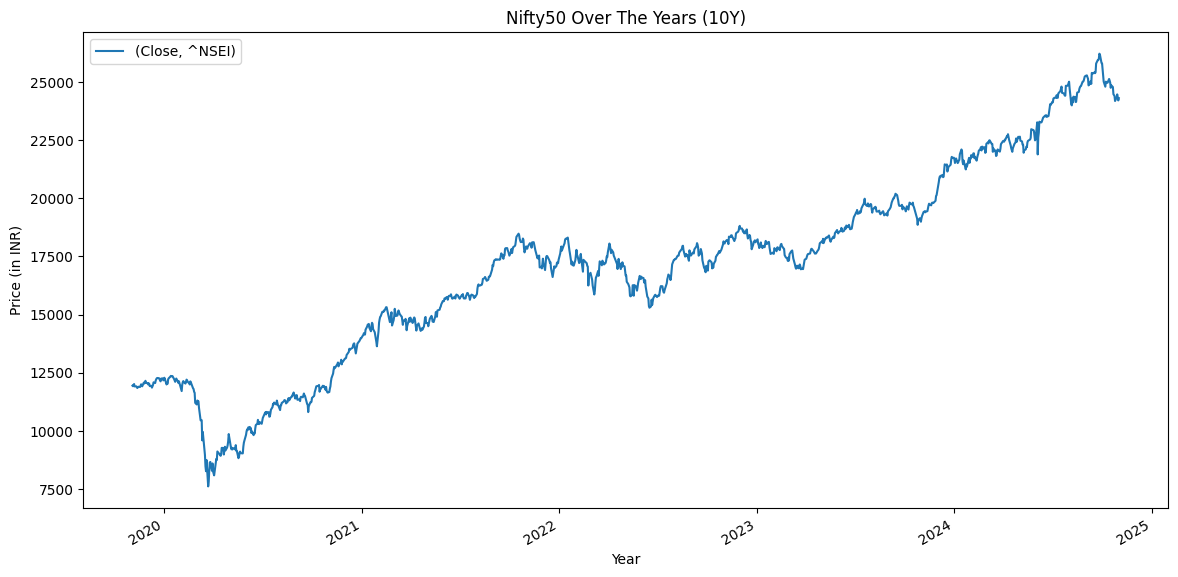

In [148]:
# Plotting the Close price
nifty_data[[ 'Close']].plot(figsize=(14, 7))
plt.title('Nifty50 Over The Years (10Y)')
plt.xlabel('Year')
plt.ylabel('Price (in INR)')
plt.legend(loc="upper left")
plt.show()

In [149]:
nifty_data.columns

MultiIndex([('Adj Close', '^NSEI'),
            (    'Close', '^NSEI'),
            (     'High', '^NSEI'),
            (      'Low', '^NSEI'),
            (     'Open', '^NSEI'),
            (   'Volume', '^NSEI')],
           names=['Price', 'Ticker'])

In [150]:
# Creating a new DataFrame with only closing price and date
df = nifty_data[['Close']].reset_index()

df.head()

Price,Date,Close
Ticker,,^NSEI
0,2019-11-04 00:00:00+00:00,11941.299805
1,2019-11-05 00:00:00+00:00,11917.200195
2,2019-11-06 00:00:00+00:00,11966.049805
3,2019-11-07 00:00:00+00:00,12012.049805
4,2019-11-08 00:00:00+00:00,11908.150391


In [124]:
# Checking for missing values in the columns
df.isna().values.any()

False

# **Training The Linear Regression Model**

In [151]:
# Importing scikit libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [126]:
# Spliting the data into training and testing sets (80, 20 Split)
train, test = train_test_split(df, test_size=0.20)

In [127]:
# Reshaping index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [128]:
# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [152]:
# Retrieving the coefficient and intercept
coefficient = np.squeeze(model.coef_).item()
intercept = model.intercept_.item()

# Printing results
print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')

Coefficient: 10.916521555975045
Intercept: 10210.13120384535


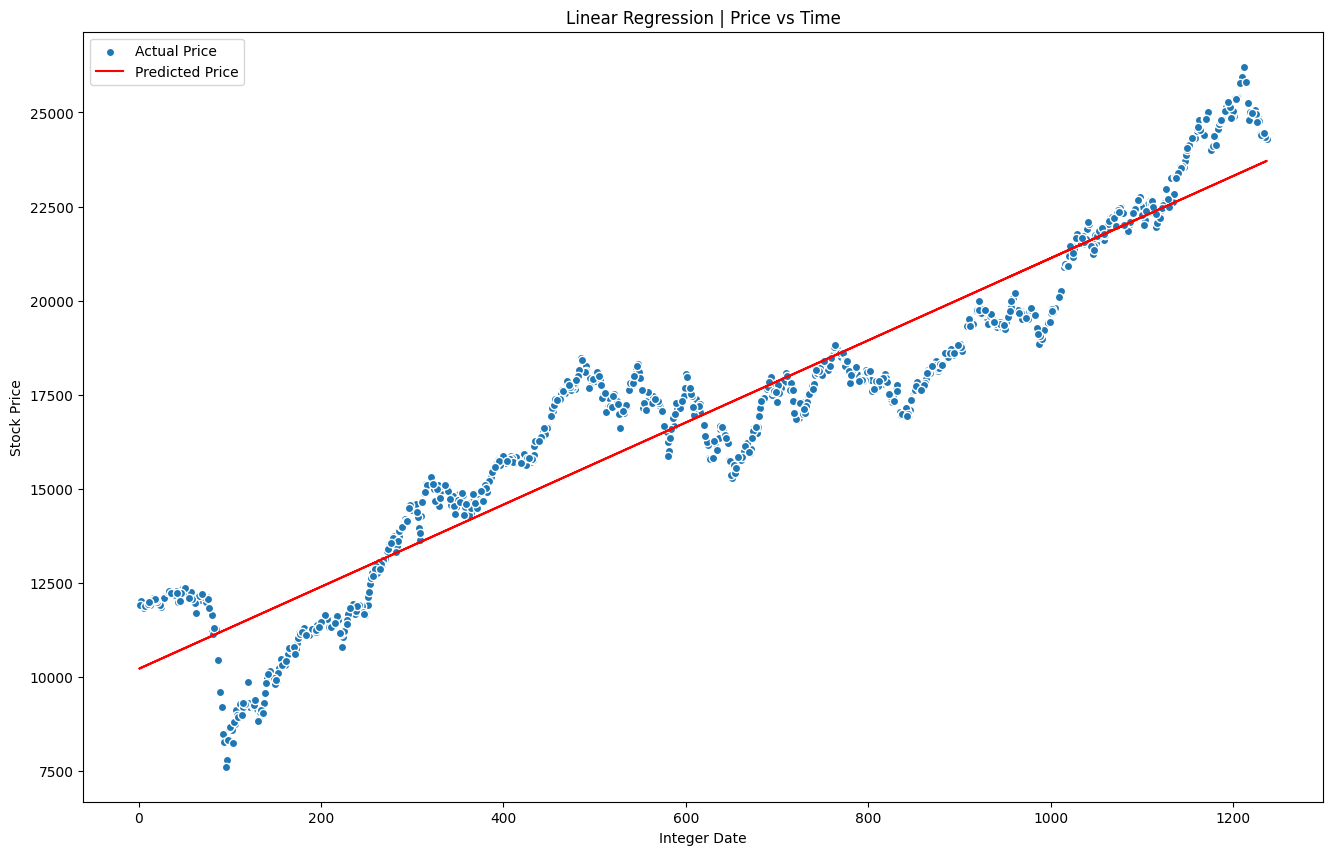

In [153]:
# Training set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#**Making Predictions from the model**

In [154]:
# Creating test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [155]:
# Generating array with predicted values
y_pred = model.predict(X_test)

#**Model Evaluation**

In [133]:
# Getting the number of rows in data set for random sample
df.shape

(1238, 2)

In [134]:
# Generating 25 random numbers
randints = np.random.randint(2550, size=25)

# Selecting row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [135]:
df_sample.head()

Price,Date,Close
Ticker,,^NSEI
2,2019-11-06 00:00:00+00:00,11966.049805
123,2020-05-06 00:00:00+00:00,9270.900391
196,2020-08-18 00:00:00+00:00,11385.349609
267,2020-11-27 00:00:00+00:00,12968.950195
325,2021-02-22 00:00:00+00:00,14675.700195


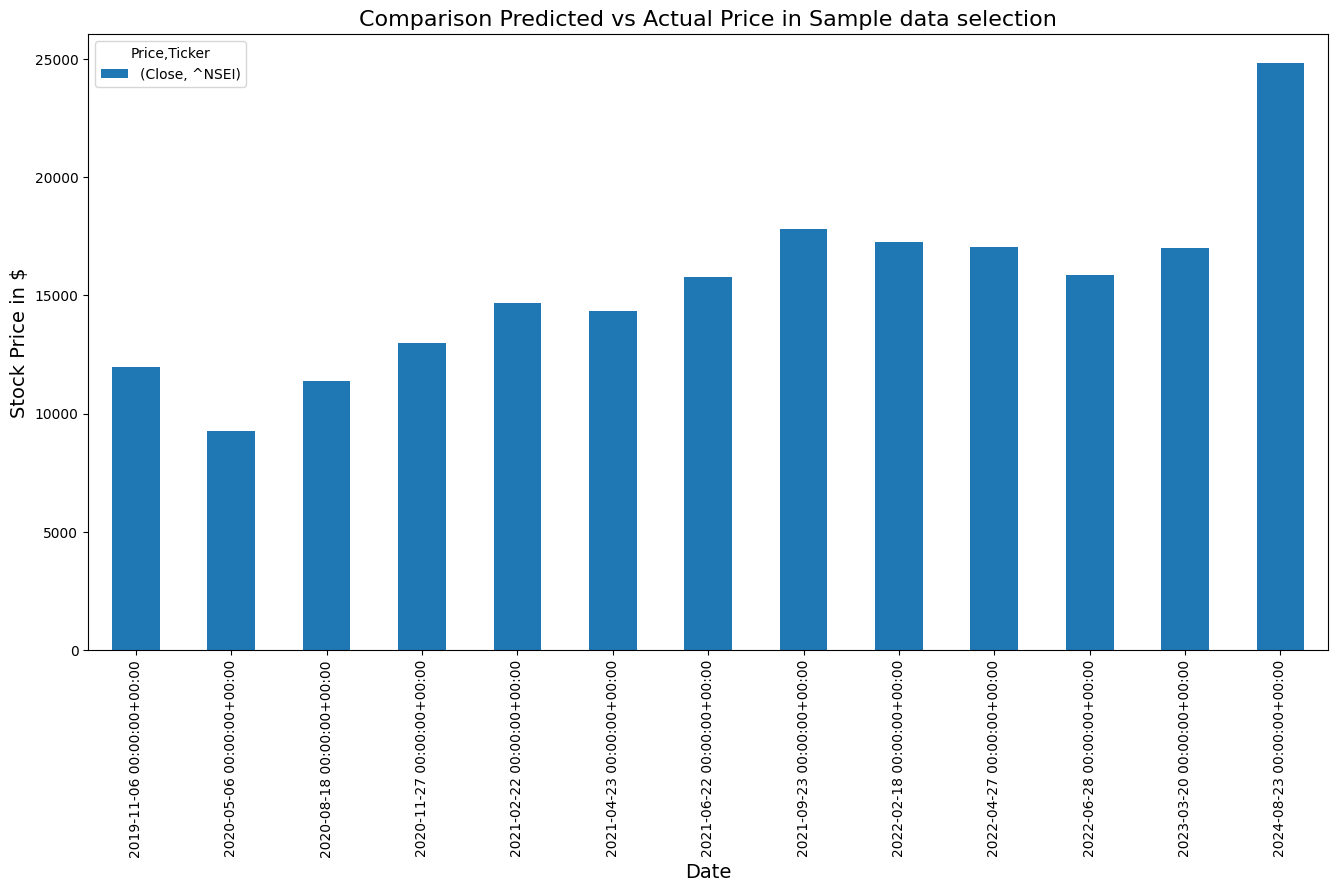

In [156]:
# Creating subplots to plot graph and control axes
fig, ax = plt.subplots()

df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax, figsize=(16, 8))

plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in $', fontsize=14)

plt.show()

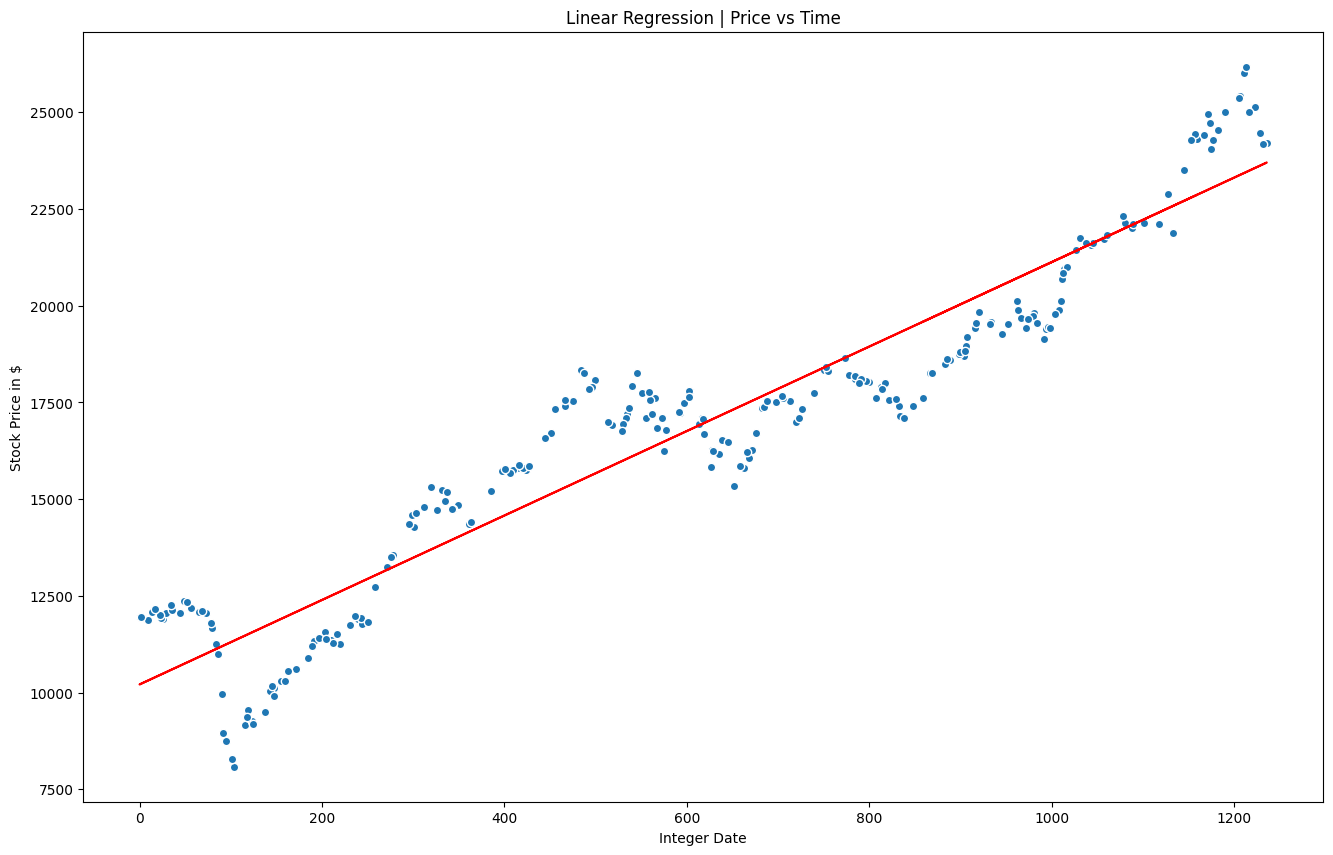

In [158]:
# Plotting fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

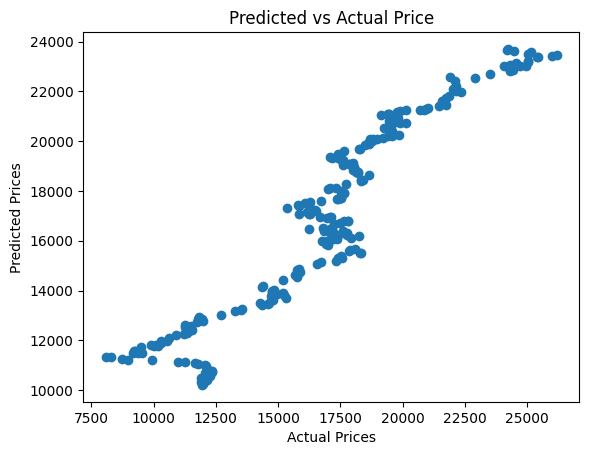

In [159]:
# Plotting predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

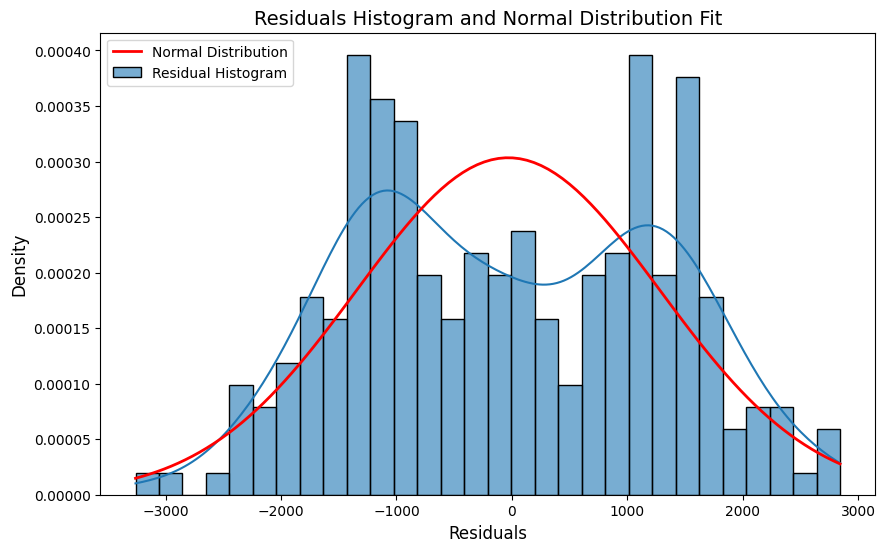

In [161]:
from scipy.stats import norm

# Calculateing residuals
residuals = y_test - y_pred

# Ensuring residuals are numeric
residuals = np.asarray(residuals, dtype=float)  # Convert to a NumPy array of type float

# Fitting a normal distribution to the residuals
mu, std = norm.fit(residuals)

# Setting up the plot
plt.figure(figsize=(10, 6))

# Plotting the histogram of residuals using seaborn
ax = sns.histplot(residuals, bins=30, kde=True, stat='density', label='Residual Histogram', color='blue', alpha=0.6)

# Calculating the PDF over a range of values
x = np.linspace(np.min(residuals), np.max(residuals), 100)  # Use np.min and np.max
p = norm.pdf(x, mu, std)

# Plotting the normal distribution
plt.plot(x, p, 'r', lw=2, label='Normal Distribution')

plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Histogram and Normal Distribution Fit', fontsize=14)
plt.legend()


plt.show()

In [162]:
# Adding new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [163]:
df.head()

Price,Date,Close,Prediction
Ticker,,^NSEI,
0,2019-11-04 00:00:00+00:00,11941.299805,10210.131204
1,2019-11-05 00:00:00+00:00,11917.200195,10221.047725
2,2019-11-06 00:00:00+00:00,11966.049805,10231.964247
3,2019-11-07 00:00:00+00:00,12012.049805,10242.880769
4,2019-11-08 00:00:00+00:00,11908.150391,10253.797290


In [165]:
# Calculating and printing values of MAE, MSE, RMSE
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1142.044982139581
Mean Squared Error: 1729513.09118487
Root Mean Squared Error: 1315.1095358124624


In [166]:
# Calculating and printing values of MAE, MSE, RMSE
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.89785112373369


In [167]:
# Calculating and printing values of Explained Variance Score

from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.8979070027511834